In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
# Set visualization style
sns.set(style='whitegrid')

# Step 1: Load the Historical Brent Oil Prices Data
# Assuming the data is in a CSV file with columns: 'Date' and 'Price'
data = pd.read_csv('../data/BrentOilPrices.csv', parse_dates=['Date'], index_col='Date')

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_21328\1999016070.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('../data/BrentOilPrices.csv', parse_dates=['Date'], index_col='Date')


In [4]:

# Step 2: Data Preprocessing
# Check for missing values
print(data.isnull().sum())

# Fill missing values with forward fill method
data['Price'].fillna(method='ffill', inplace=True)

Price    0
dtype: int64


C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_21328\4281021542.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price'].fillna(method='ffill', inplace=True)
C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_21328\4281021542.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'].fillna(method='ffill', inplace=True)


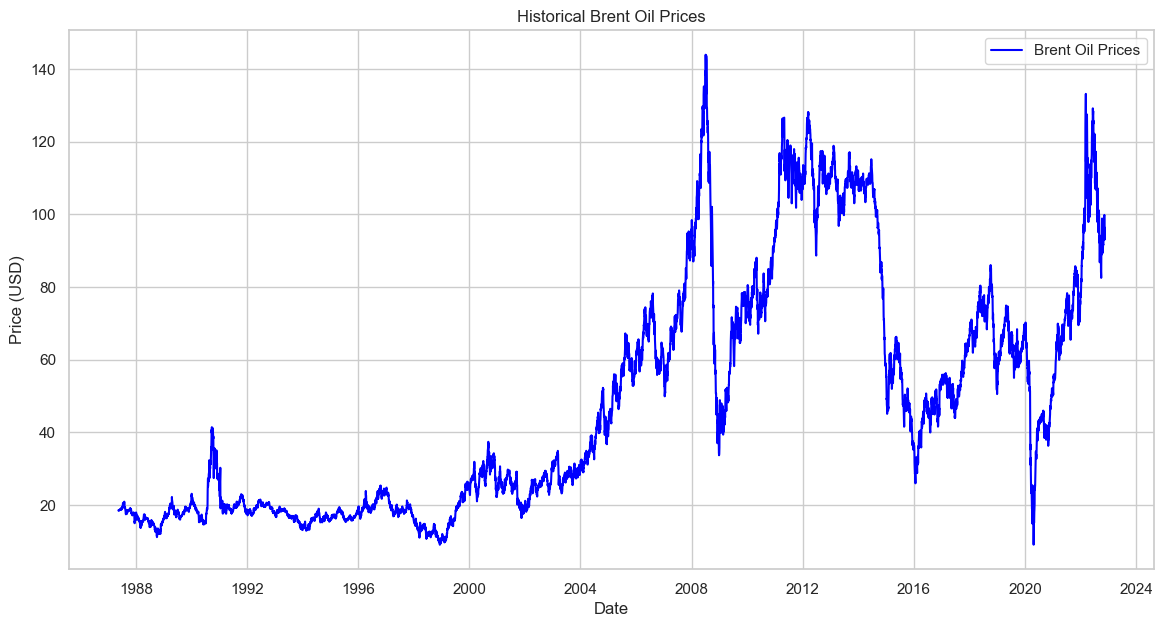

In [5]:
# Step 3: Exploratory Data Analysis
# Plot the historical prices
plt.figure(figsize=(14, 7))
plt.plot(data['Price'], label='Brent Oil Prices', color='blue')
plt.title('Historical Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [6]:

# Step 4: Check for Stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is not stationary.")

# Test stationarity of the price series
test_stationarity(data['Price'])

ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
The time series is not stationary.


In [8]:
# Check for missing values in the dataset
print(data.isnull().sum())

Price         0
Price_diff    1
dtype: int64


In [9]:
data['Price'].fillna(method='ffill', inplace=True)

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_21328\624985610.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price'].fillna(method='ffill', inplace=True)
C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_21328\624985610.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'].fillna(method='ffill', inplace=True)


In [10]:
# Replace any infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [13]:
# Step 2: Data Preprocessing
# Check for missing values
print(data.isnull().sum())

# Handle missing values (choose one method)
data['Price'].fillna(method='ffill', inplace=True)
# Alternatively, you can use:
# data['Price'].interpolate(method='linear', inplace=True)

# Check for infinite values and replace with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)  # Drop any remaining NaNs

# Step 4: Check for Stationarity
test_stationarity(data['Price'])

# Step 5: Differencing to Make the Series Stationary (if necessary)
data['Price_diff'] = data['Price'].diff()
data['Price_diff'].dropna(inplace=True)
test_stationarity(data['Price_diff'])

# Step 6: Fit an ARIMA Model
# Define the model (p, d, q) parameters
model = ARIMA(data['Price'], order=(5, 1, 0))  # Adjust p, d, q as necessary
model_fit = model.fit()

Price         0
Price_diff    1
dtype: int64


C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_21328\713608420.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price'].fillna(method='ffill', inplace=True)
C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_21328\713608420.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'].fillna(method='ffill', inplace=True)


ADF Statistic: -1.9918544071295257
p-value: 0.29015603926422134
The time series is not stationary.


MissingDataError: exog contains inf or nans

In [14]:

# Step 7: Forecasting
forecast = model_fit.forecast(steps=30)  # Forecasting the next 30 days

# Step 8: Plot Forecast
plt.figure(figsize=(14, 7))
plt.plot(data['Price'], label='Historical Prices', color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=30, freq='D'), forecast, label='Forecasted Prices', color='orange')
plt.title('Brent Oil Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

NameError: name 'model_fit' is not defined

In [ ]:

# Step 9: Evaluate the Model (if test data is available)
# Uncomment if you have a separate test set
# test_data = pd.read_csv('brent_oil_test_data.csv', parse_dates=['Date'], index_col='Date')
# predictions = model_fit.forecast(steps=len(test_data))
# mse = mean_squared_error(test_data['Price'], predictions)
# print('Mean Squared Error:', mse)

###Explanation of the Code
Library Imports: The code imports necessary libraries for data manipulation, visualization, and time series analysis.
Data Loading: It loads historical Brent oil prices from a CSV file.
Data Preprocessing: It checks for missing values and fills them using forward fill.
Exploratory Data Analysis: It plots the historical price data.
Stationarity Check: The Augmented Dickey-Fuller test is used to check if the time series is stationary.
Differencing: If the series is not stationary, it applies differencing to make it stationary.
Fitting ARIMA Model: An ARIMA model is fit to the data.
Forecasting: It forecasts future prices for the next 30 days.
Plotting Forecasts: The historical prices and forecasted prices are plotted for visualization.
Model Evaluation: (Optional) If you have a separate test dataset, you can evaluate the model’s performance using MSE.

In [15]:
# Import necessary libraries for VAR
from statsmodels.tsa.api import VAR

# Assume you have another time series (e.g., economic indicators) to include
# For example, let's create a dummy DataFrame for demonstration
# Replace this with actual data, e.g., GDP or other economic indicators
data['Economic_Indicator'] = np.random.randn(len(data))  # Dummy data

# Fit a VAR model
model = VAR(data[['Price', 'Economic_Indicator']])
model_fitted = model.fit(maxlags=5)

# Print summary of the model
print(model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 04, Nov, 2024
Time:                     22:06:46
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.432215
Nobs:                     9005.00    HQIC:                  0.420763
Log likelihood:          -27401.0    FPE:                    1.51415
AIC:                     0.414856    Det(Omega_mle):         1.51046
--------------------------------------------------------------------
Results for equation Price
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.039145         0.022822            1.715           0.086
L1.Price                      1.025730         0.010546           97.260           0.000
L1.Economic_Indicator       

c:\Users\Tesfaye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [16]:

# Forecasting with VAR
forecast = model_fitted.forecast(model_fitted.y, steps=30)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D'), columns=['Price_Forecast', 'Economic_Indicator_Forecast'])

# Plotting the forecast
plt.figure(figsize=(14, 7))
plt.plot(data['Price'], label='Historical Prices', color='blue')
plt.plot(forecast_df['Price_Forecast'], label='VAR Forecasted Prices', color='orange')
plt.title('VAR Model Forecast for Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

AttributeError: 'VARResults' object has no attribute 'y'